In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from utils import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
jedi_trials =  torch.load('./data/Jedi/jedi_trials.pd')

In [197]:
def plot_2dhist(rat_name, goal_radius=15):
    fig, ax = plt.subplots(1, 8, figsize=(3*8, 3))
    for k in range(8): # each rat has 8 trials in Jedi task
        _goal_pos = jedi_trials[rat_name][k]['goal_pos']
        _body_angle_still = jedi_trials[rat_name][k]['body_rotation_speed'] < 12
        _bmi_pos = jedi_trials[rat_name][k]['dec_pos'][_body_angle_still] # exclude periods of body rotation speed > 12/s (not focus on task when animal just rotate its body)
        _bmi_t = jedi_trials[rat_name][k]['bmi_t']
        _bmi_stillness_duration = len(_bmi_pos)/10
        _bmi_duration = _bmi_t[-1] - _bmi_t[0]

        from scipy.ndimage import gaussian_filter
        bmi_hist2d = np.histogram2d(_bmi_pos[:, 0], -_bmi_pos[:, 1],
                                    bins=np.linspace(-50, 50, 51))[0]
        bmi_hist2d = gaussian_filter(bmi_hist2d, sigma=2)
        goal_center = (_goal_pos[0], -_goal_pos[1])
        goal_region = plt.Circle(goal_center, goal_radius, color='w', linewidth=2.5, fill=False, alpha=1)
        X, Y = np.linspace(-50, 50, 50), np.linspace(-50, 50, 50)
        ax[k].pcolormesh(X, Y, bmi_hist2d.T, cmap='coolwarm', shading='gouraud')
        ax[k].add_patch(goal_region)
        # draw a cross at x=0 with a length of 0.1
        ax[k].axhline(0, xmin=0.45, xmax=0.55, color='w')
        ax[k].axvline(0, ymin=0.45, ymax=0.55, color='w')

        ax[k].set_xlim(-50, 50)
        ax[k].set_ylim(-50, 50)
        ax[k].set_xticklabels([])
        ax[k].set_yticklabels([])
        ax[k].set_xticks([])
        ax[k].set_yticks([])
        ax[k].set_aspect('equal', 'box')
        if _bmi_duration >= 180:
            _bmi_duration = 187.4
        ax[k].set_title('trial {}: {:.1f}/{:.1f} s'.format(k, _bmi_stillness_duration, _bmi_duration), fontsize=18)
    return fig

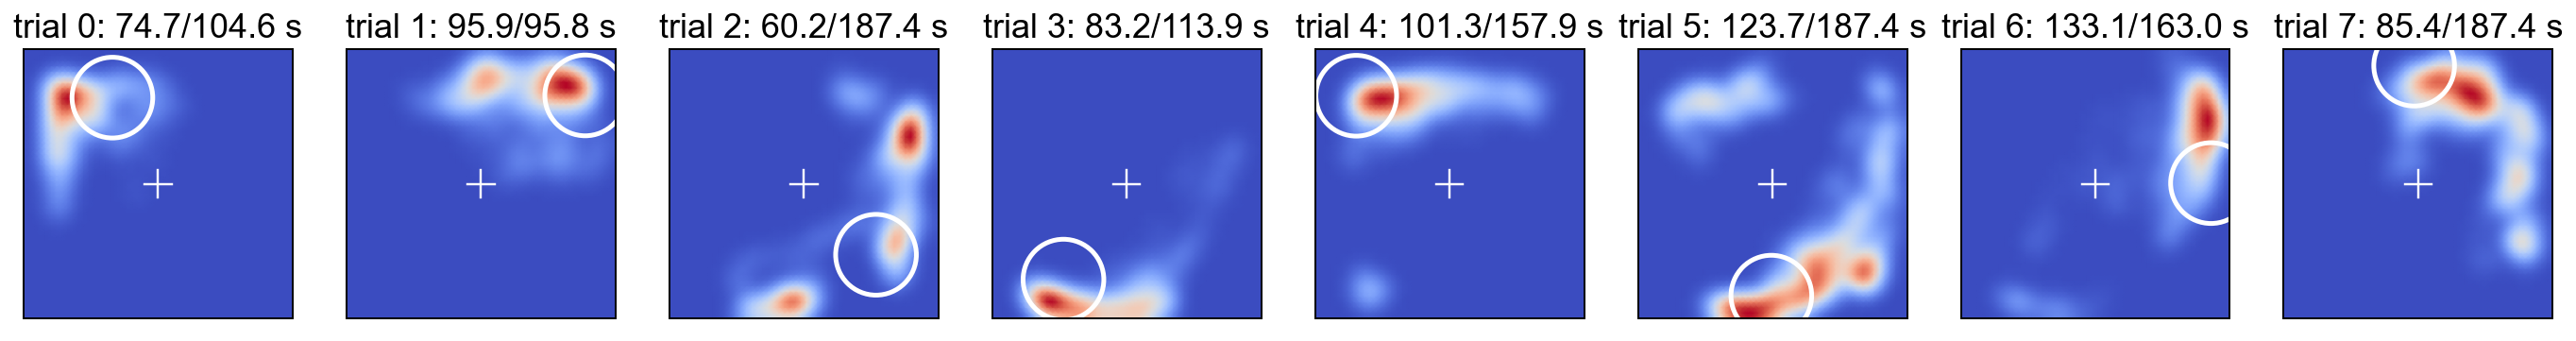

In [198]:
fig = plot_2dhist('wr112');

In [47]:
fig.savefig('./data/Jedi/2dhist_jedi_wr112.png', dpi=300, bbox_inches='tight')

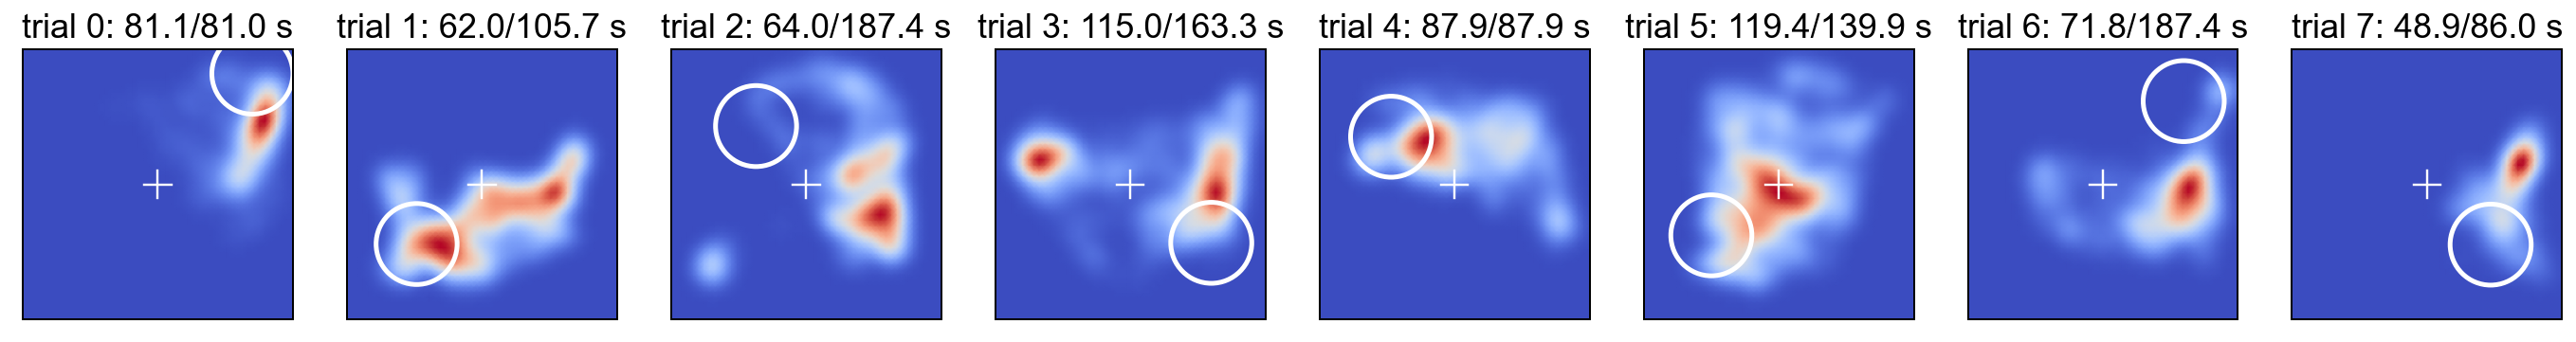

In [200]:
fig = plot_2dhist('wr118');

In [49]:
fig.savefig('./data/Jedi/2dhist_jedi_wr118.png', dpi=300, bbox_inches='tight')

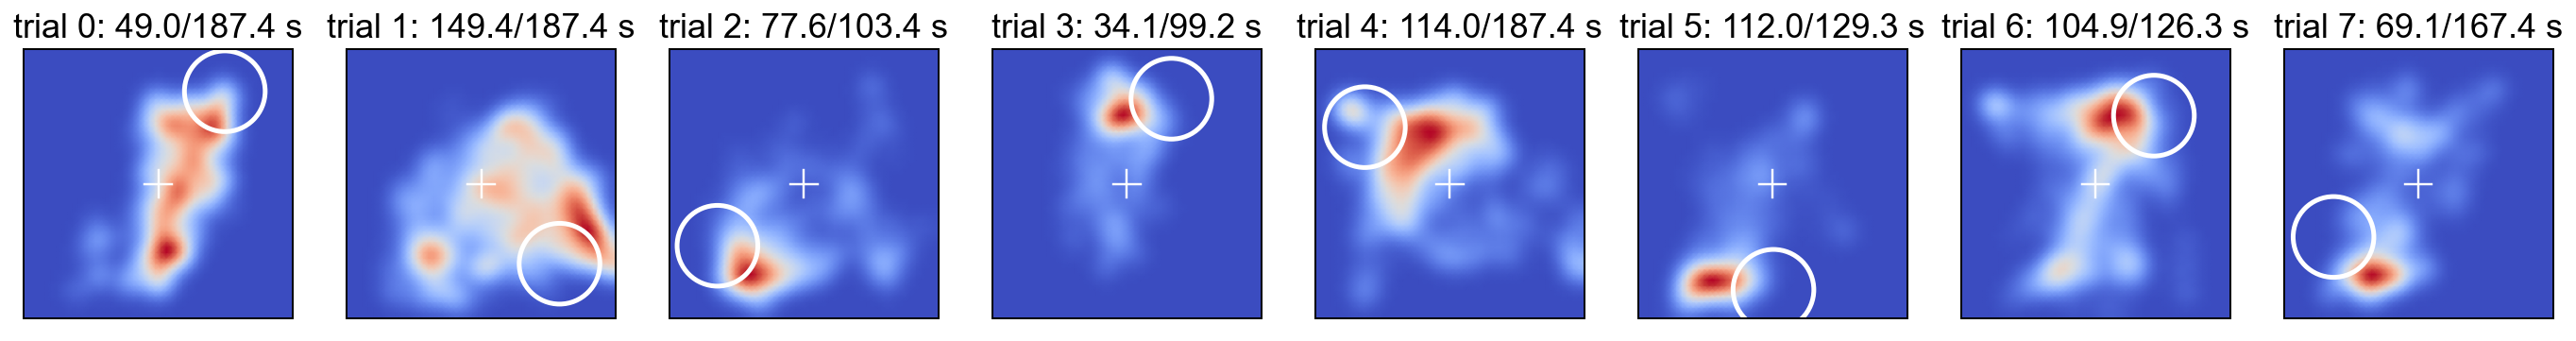

In [201]:
fig = plot_2dhist('wr121');

In [51]:
fig.savefig('./data/Jedi/2dhist_jedi_wr121.png', dpi=300, bbox_inches='tight')

# cdf of ball movement 

In [60]:
bv_112 = []
for i in range(8):
    body_angle_still = jedi_trials['wr112'][i]['body_rotation_speed']<12
    bv_112.append(jedi_trials['wr112'][i]['bv'][body_angle_still])
bv_112 = np.hstack(bv_112)

bv_118 = []
for i in range(8):
    body_angle_still = jedi_trials['wr118'][i]['body_rotation_speed']<12
    bv_118.append(jedi_trials['wr118'][i]['bv'][body_angle_still])
bv_118 = np.hstack(bv_118)

bv_121 = []
for i in range(8):
    body_angle_still = jedi_trials['wr121'][i]['body_rotation_speed']<12
    bv_121.append(jedi_trials['wr121'][i]['bv'][body_angle_still])
bv_121 = np.hstack(bv_121)

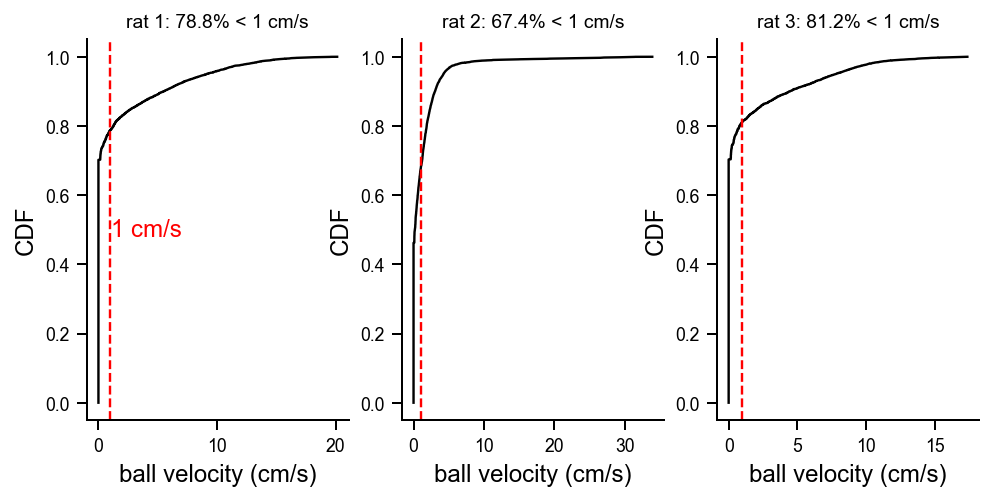

In [61]:
# plot three by one subplots, each subplot is a cumulative distribution function (cdf) of ball velocity for wr112, wr118, wr121
fig, ax = plt.subplots(1,3,figsize=(8, 3.5))

plot_cdf(bv_112, 'k', ax=ax[0])
ax[0].axvline(1, c='r', ls='--');
low_bv_percent_112 = (np.sum(bv_112 < 1)) / len(bv_112)
ax[0].set_title(f'rat 1: {low_bv_percent_112*100:.1f}% < 1 cm/s');

plot_cdf(bv_118, 'k', ax=ax[1])
ax[1].axvline(1, c='r', ls='--');
low_bv_percent_118 = (np.sum(bv_118 < 1)) / len(bv_118)
ax[1].set_title(f'rat 2: {low_bv_percent_118*100:.1f}% < 1 cm/s');

plot_cdf(bv_121, 'k', ax=ax[2])
ax[2].axvline(1, c='r', ls='--');
low_bv_percent_121 = (np.sum(bv_121 < 1)) / len(bv_121)
ax[2].set_title(f'rat 3: {low_bv_percent_121*100:.1f}% < 1 cm/s');

# ax1 put text around dotted red line (1 cm/s)
ax[0].text(1.1, 0.5, '1 cm/s', fontsize=12, color='r', va='center')

# get rid of the top and right spines for all subplots
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

# long (>8s) non-movement segments

In [132]:
wr112_non_move_segments = np.array([[381.9, 393.5],
                                    [399.2, 420.6],
                                    [449.2, 470.3],
                                    [477.5, 492],
                                    [772.4, 785.1],
                                    [786.2, 794.9],
                                    [796.5, 814.6],
                                    [901, 942.8],
                                    [944.5, 984.6],
                                    [1103, 1116.6],
                                    [1119, 1137.8],
                                    [1149.5, 1172.2],
                                    [1204.6, 1213.9],
                                    [1226.6, 1243.4],
                                    [1263.9, 1284.1],
                                    [1363.6, 1384.2],
                                    [1405.5, 1422.1],
                                    [1423., 1435.3]])

wr118_non_move_segments = np.array([[675.5, 684],
                                    [919.3, 928.5],
                                    [981, 989.6],
                                    [1024.4, 1034.4],
                                    [1038.1, 1046.2],
                                    [1081.5, 1090.2],
                                    [1212.5, 1223.8],
                                    [1489.3, 1498.3],
                                    [1513.6, 1523]])

wr121_non_move_segments = np.array([[1549, 1560.7],
                                    [1728.5, 1753.2],
                                    [1795.9, 1819],
                                    [1909, 1917],
                                    [2097, 2133],
                                    [2169.2, 2184.4],
                                    [2196.6, 2222.9],
                                    [2231.2, 2275.2],
                                    [2311.5, 2321.5],
                                    [2369.2, 2393.6],
                                    [2478.5, 2492],
                                    ])


In [170]:
# toi = [920, 980]
toi = wr112_non_move_segments[8]
trial_no = 4
rat_name = 'wr112'
bv_toi = TimeSeries(t = jedi_trials[rat_name][trial_no]['bmi_t'], data = jedi_trials[rat_name][trial_no]['bv']).between(toi[0], toi[1])

In [171]:
dec_pos_ts = TimeSeries(t = jedi_trials[rat_name][trial_no]['bmi_t'], data = jedi_trials[rat_name][trial_no]['dec_pos']).between(toi[0], toi[1])
bmi_t = dec_pos_ts.t 
dec_pos = dec_pos_ts.data

In [172]:
goal_pos = jedi_trials[rat_name][trial_no]['goal_pos']

In [173]:
goal_dist = np.clip(np.linalg.norm(dec_pos - goal_pos, axis=1) - 15, 0, 1000)

In [174]:
bmi_t.shape, goal_dist.shape

((401,), (401,))

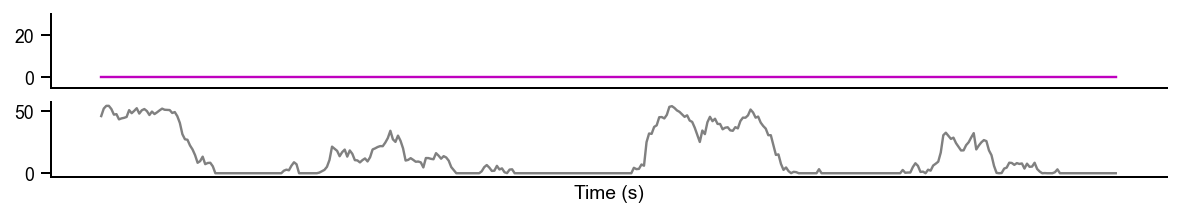

In [175]:
fig, ax = plt.subplots(2, 1, figsize=(10, 1.5), sharex=True)
bv_toi.plot(ax = ax[0], c='m');  # treadmill velocity
ax[0].set_ylim(-5, 30);
ax[0].set_xticks([])
ax[1].plot(bmi_t, goal_dist, c='gray');  # distance from decoded location to goal
ax[1].set_xlabel('Time (s)')
# remove the top and right spines from all subplots
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
